In [1]:
#Practica de una red Neuronal
# Machine Learnig


import numpy as np
 
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - x**2
 
 
class NeuralNetwork:
 
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada
 
        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [2,3,2]
        # rando de pesos varia entre (-1,1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # asigno aleatorios a capa de salida
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
 
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
 
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # Calculo la diferencia en la capa de salida y el valor obtenido
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            # Empezamos en el segundo layer hasta el ultimo
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)
 
            # invertir
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()
 
            # backpropagation
            # 1. Multiplcar los delta de salida con las activaciones de entrada 
            #    para obtener el gradiente del peso.
            # 2. actualizo el peso restandole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
 
            if k % 10000 == 0: print('epochs:', k)
 
    def predict(self, x): 
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
 
    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])
 
    def get_deltas(self):
        return self.deltas

In [2]:
    creamos una red a nuestra medida,
    con 2 neuronas de entrada, 3 ocultas y 2 de salida.
    Deberemos ir ajustando los parámetros de entrenamiento
    learning rate y la cantidad de iteraciones “epochs” para obtener buenas predicciones.

SyntaxError: invalid syntax (<ipython-input-2-1b78eb737269>, line 1)

In [3]:
nn = NeuralNetwork([2,3,2],activation ='tanh')
X = np.array([[0, 0],   # sin obstaculos
              [0, 1],   # sin obstaculos
              [0, -1],  # sin obstaculos
              [0.5, 1], # obstaculo detectado a derecha
              [0.5,-1], # obstaculo a izq
              [1,1],    # demasiado cerca a derecha
              [1,-1]])  # demasiado cerca a izq
 
y = np.array([[0,1],    # avanzar
              [0,1],    # avanzar
              [0,1],    # avanzar
              [-1,1],   # giro izquierda
              [1,1],    # giro derecha
              [0,-1],   # retroceder
              [0,-1]])  # retroceder
nn.fit(X, y, learning_rate=0.03,epochs=15001)
 
index=0
for e in X:
    print("X:",e,"y:",y[index],"Network:",nn.predict(e))
    index=index+1

epochs: 0
epochs: 10000
X: [0. 0.] y: [0 1] Network: [0.00153462 0.99998068]
X: [0. 1.] y: [0 1] Network: [-0.00505356  0.99977152]
X: [ 0. -1.] y: [0 1] Network: [0.00124102 0.99998491]
X: [0.5 1. ] y: [-1  1] Network: [-0.94622423  0.96600573]
X: [ 0.5 -1. ] y: [1 1] Network: [0.94787809 0.95111748]
X: [1. 1.] y: [ 0 -1] Network: [-0.00318371 -0.98297178]
X: [ 1. -1.] y: [ 0 -1] Network: [ 0.00682288 -0.96982233]


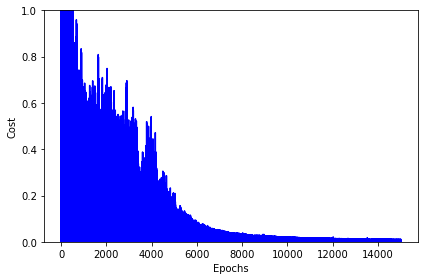

In [4]:
import matplotlib.pyplot as plt
 
deltas = nn.get_deltas()
valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index=index+1
 
plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 1])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()
